<img src=https://i.imgur.com/WKQ0nH2.jpg height=350>

# Setup and Context


### Introduction
Build a model that can provide a price estimate based on a home's characteristics like:
* The number of rooms
* The distance to employment centres
* How rich or poor the area is
* How many students there are per teacher in local schools etc

<img src=https://i.imgur.com/WfUSSP7.png height=350>



###  Import Statements


In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import skew

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

The first column in the .csv file just has the row numbers, so it will be used as the index. 

In [3]:
data = pd.read_csv('Data/boston.csv', index_col=0)

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y). 


# Preliminary Data Exploration 🔎

In [4]:
data.shape
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [5]:
data.head()

data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

In [6]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [7]:
data.duplicated().sum()

0

## Descriptive Statistics

**Challenge**

* How many students are there per teacher on average?
* What is the average price of a home in the dataset?
* What is the `CHAS` feature? 
* What are the minimum and the maximum value of the `CHAS` and why?
* What is the maximum and the minimum number of rooms per dwelling in the dataset?

In [8]:
data.describe()

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
count 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00   
mean    3.61  11.36  11.14   0.07   0.55   6.28  68.57   3.80   9.55 408.24   
std     8.60  23.32   6.86   0.25   0.12   0.70  28.15   2.11   8.71 168.54   
min     0.01   0.00   0.46   0.00   0.39   3.56   2.90   1.13   1.00 187.00   
25%     0.08   0.00   5.19   0.00   0.45   5.89  45.02   2.10   4.00 279.00   
50%     0.26   0.00   9.69   0.00   0.54   6.21  77.50   3.21   5.00 330.00   
75%     3.68  12.50  18.10   0.00   0.62   6.62  94.07   5.19  24.00 666.00   
max    88.98 100.00  27.74   1.00   0.87   8.78 100.00  12.13  24.00 711.00   

       PTRATIO      B  LSTAT  PRICE  
count   506.00 506.00 506.00 506.00  
mean     18.46 356.67  12.65  22.53  
std       2.16  91.29   7.14   9.20  
min      12.60   0.32   1.73   5.00  
25%      17.40 375.38   6.95  17.02  
50%      19.05 391.44  11.36  21.20  
75%      20.20 396.23  16.96  25.00  
max      22.00 396.90  37.97  50.00

## Visualise the Features


#### House Prices 💰

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



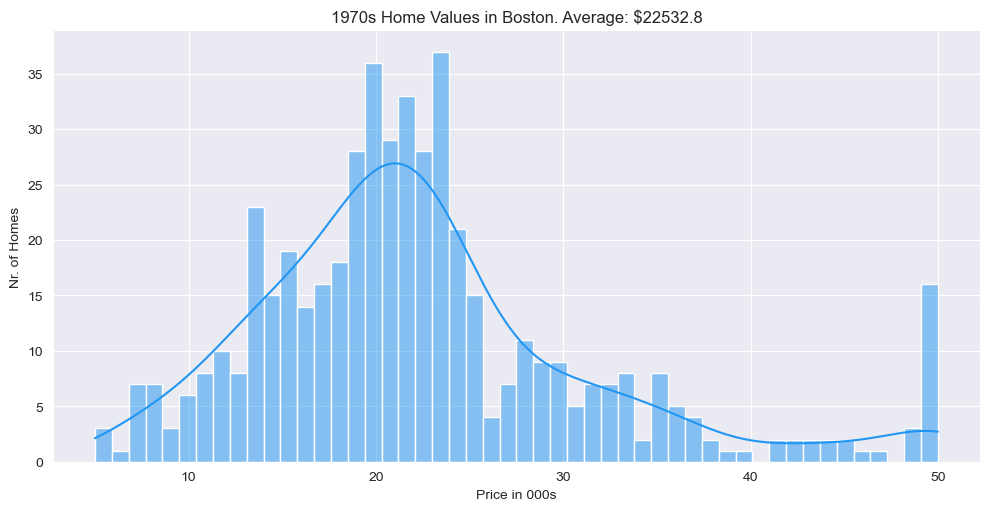

In [83]:
sns.displot(data['PRICE'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'1970s Home Values in Boston. Average: ${(1000*data.PRICE.mean()):.6}')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Homes')

plt.show()

#### Distance to Employment - Length of Commute 🚗

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



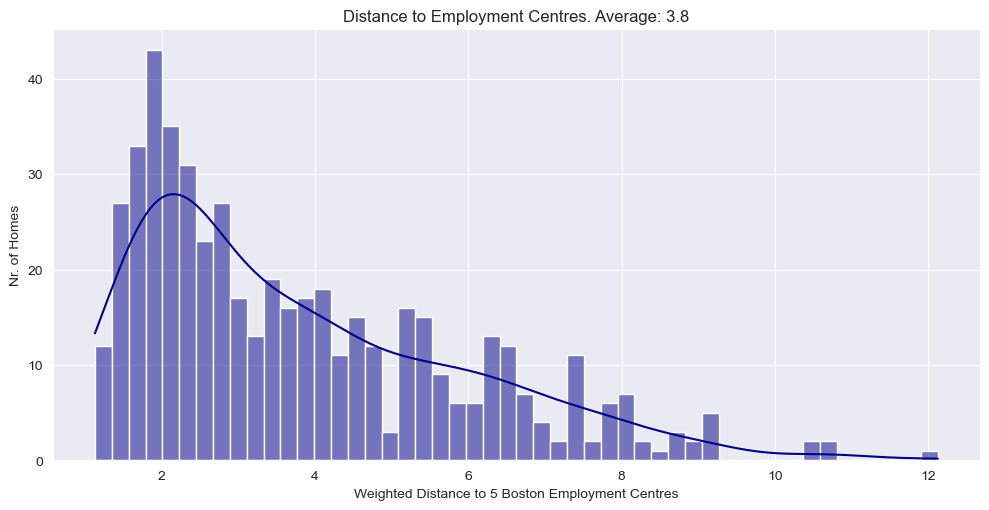

In [85]:
sns.displot(data.DIS, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='darkblue')

plt.title(f'Distance to Employment Centres. Average: {(data.DIS.mean()):.2}')
plt.xlabel('Weighted Distance to 5 Boston Employment Centres')
plt.ylabel('Nr. of Homes')

plt.show()

#### Number of Rooms

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



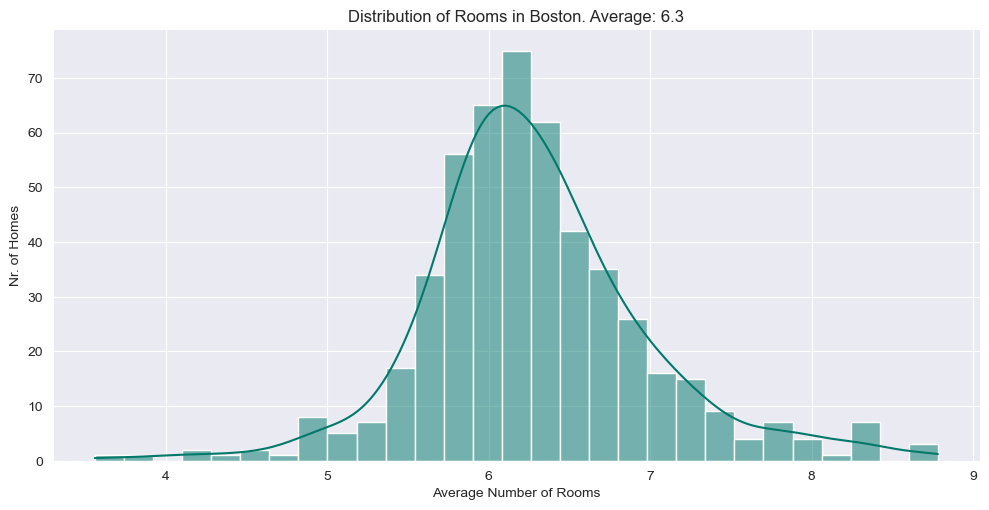

In [84]:
sns.displot(data.RM, 
            aspect=2,
            kde=True, 
            color='#00796b')

plt.title(f'Distribution of Rooms in Boston. Average: {data.RM.mean():.2}')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Homes')

plt.show()

#### Access to Highways 🛣

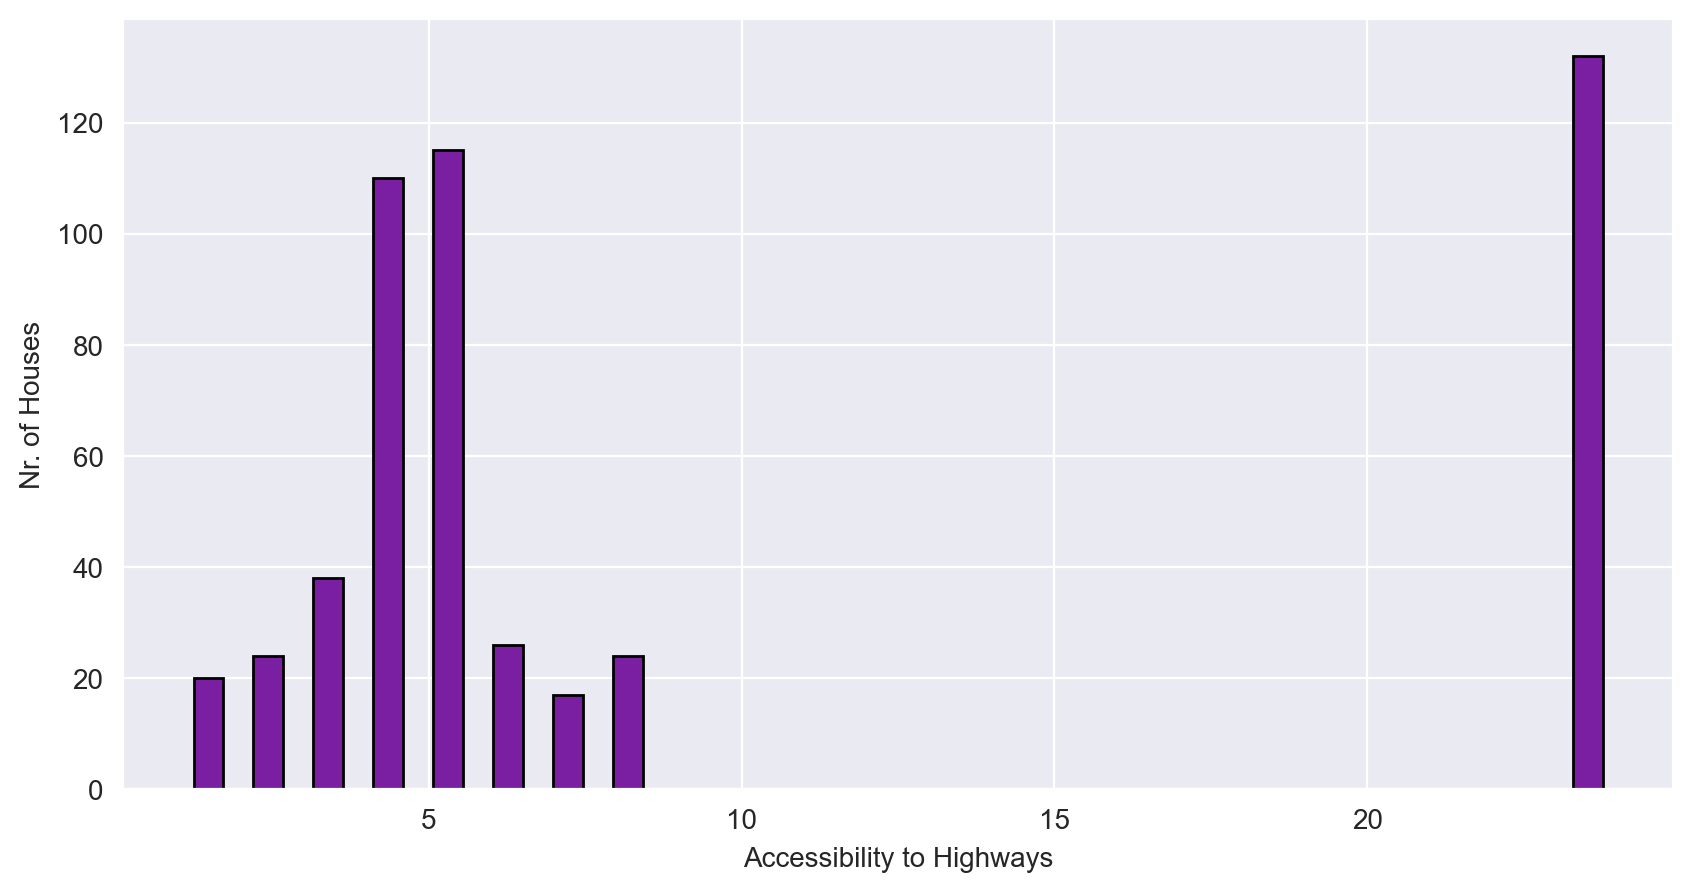

In [87]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist(data['RAD'], 
         bins=24, 
         ec='black', 
         color='#7b1fa2', 
         rwidth=0.5)

plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

#### Next to the River? ⛵️

In [13]:
chas_counts = data['CHAS'].value_counts()

fig = px.bar(x=['No','YES'], 
             y=chas_counts.values,
             color=chas_counts.index,
             labels={'x': 'CHAS', 'y': 'Number of Homes'}
             )
fig.update_layout(title='Total Number of Homes away from the river')
fig.show()

<img src=https://i.imgur.com/b5UaBal.jpg height=350>

# Understand the Relationships in the Data

### Run a Pair Plot

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed

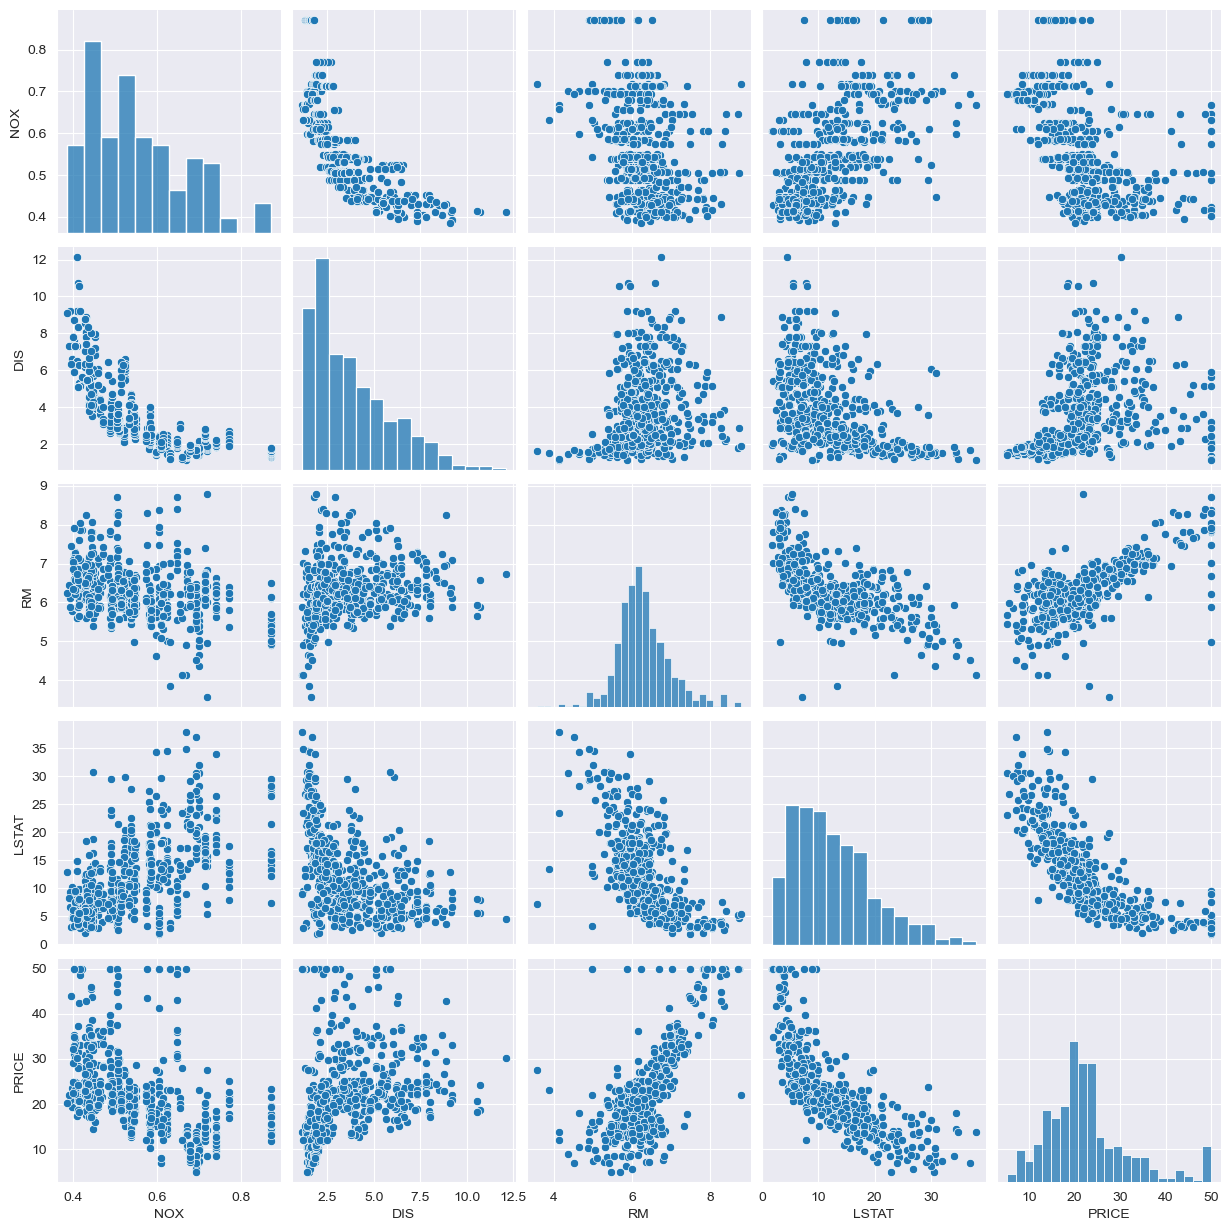

In [14]:
sns.pairplot(data[['NOX', 'DIS', 'RM', 'LSTAT', 'PRICE']])
plt.show()


* DIS and NOX
* INDUS vs NOX
* LSTAT vs RM
* LSTAT vs PRICE
* RM vs PRICE


#### Distance from Employment vs. Pollution

 Does pollution go up or down as the distance increases? The pollution goes down significantly.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



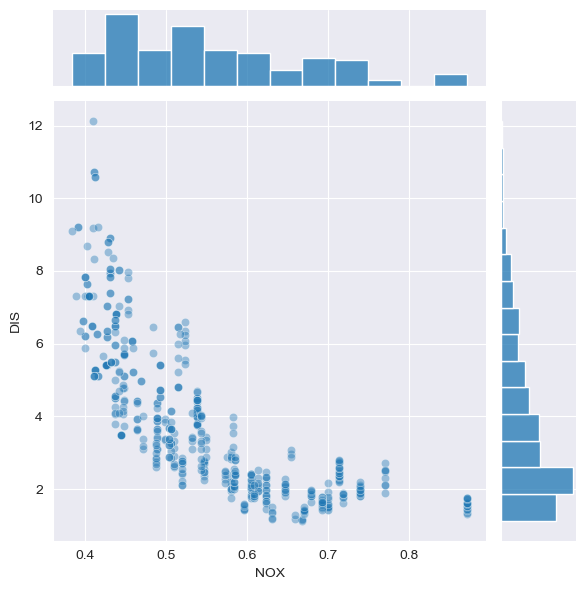

In [15]:
sns.jointplot(data,
              x='NOX',
              y='DIS',
              joint_kws={'alpha':0.4},
              kind='scatter')


#### Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution 

Does pollution go up or down as there is a higher proportion of industry? Decreases

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



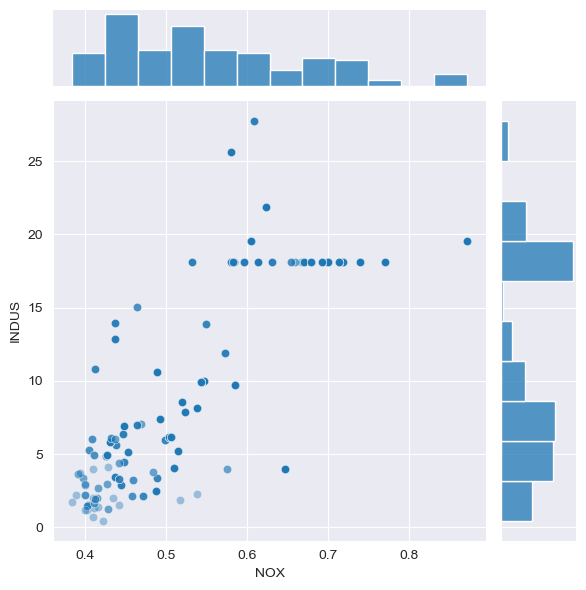

In [16]:
sns.jointplot(data,
              x='NOX',
              y='INDUS',
              joint_kws={'alpha':0.4},
              kind='scatter')

#### % of Lower Income Population vs Average Number of Rooms
How does the number of rooms per dwelling vary with the poverty of area? Do homes have more or fewer rooms when LSTAT is low? : The number of rooms per home shows higher concentration at center i.e the middle class and lower at both the ends, From the graph the RM is low when LSTAT is low.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



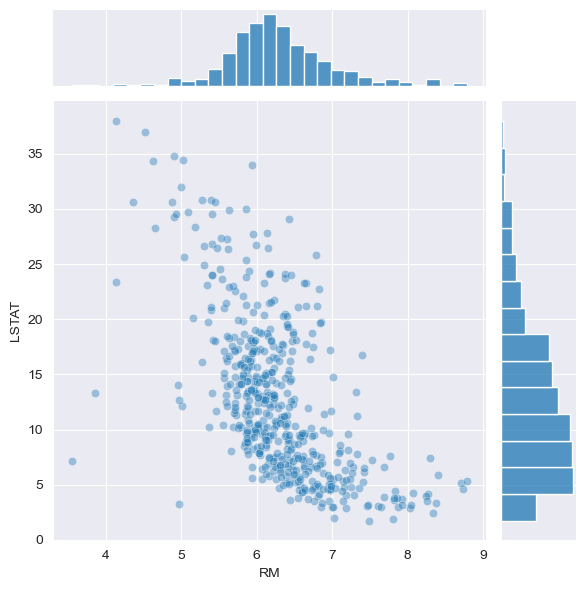

In [17]:
sns.jointplot(data,
              x='RM',
              y='LSTAT',
              joint_kws={'alpha':0.4},
              kind='scatter')

#### % of Lower Income Population versus Home Price
How does the proportion of the lower-income population in an area affect home prices? It shows inversely proportion to the home prices.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



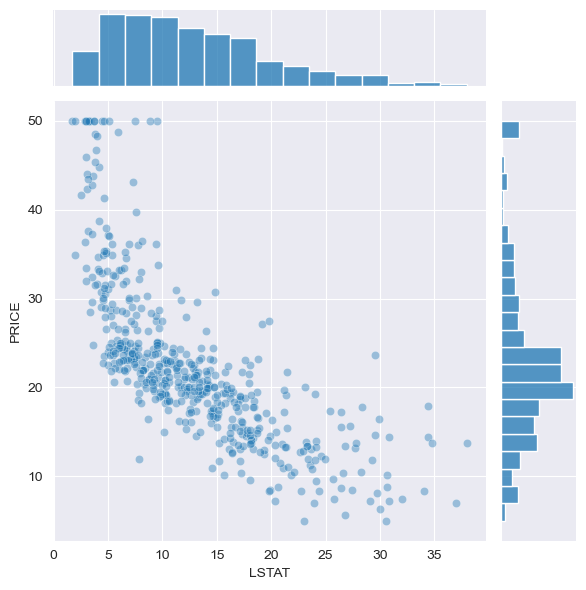

In [18]:
sns.jointplot(data,
              x='LSTAT',
              y='PRICE',
              joint_kws={'alpha':0.4},
              kind='scatter')

#### Number of Rooms versus Home Value

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



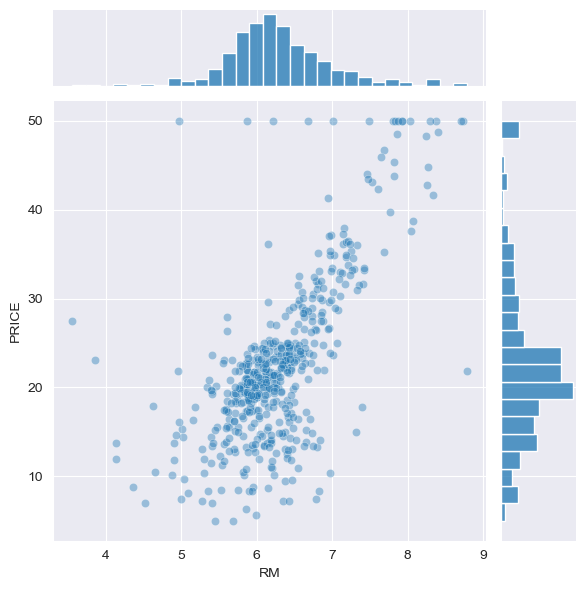

In [19]:
sns.jointplot(data,
              x='RM',
              y='PRICE',
              joint_kws={'alpha':0.4},
              kind='scatter')

# Split Training & Test Dataset



In [20]:
# Define the Features (X) and Target (y)
X = data.drop(columns=['PRICE']) # ALl columns except the 'PRICE'
y = data.PRICE

In [21]:
'''Creating 4 subsets and splitting in the ratio 80(train)/20(test)'''
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

print(X_train.shape,X_test.shape,y_test.shape,y_train.shape)

(404, 13) (102, 13) (102,) (404,)


# Multivariable Regression

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

In [22]:
regression = LinearRegression()

In [23]:
regression.fit(X_train,y_train)
# R_Squared
regression.score(X_train,y_train)
print(f'The model explains about {round(regression.score(X_train,y_train)*100)}%')

'''Indicated the model explains larger portion of the target variable based on the features i.e about 75% and 
the remaining 25% is not error but unexplainable by the model'''

The model explains about 75%


'Indicated the model explains larger portion of the target variable based on the features i.e about 75% and \nthe remaining 25% is not error but unexplainable by the model'

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

In [24]:
df_coefficients = pd.DataFrame({'features':X_train.columns,'coefficients':regression.coef_})

df_coefficients

features  coefficients
0      CRIM         -0.13
1        ZN          0.06
2     INDUS         -0.01
3      CHAS          1.97
4       NOX        -16.27
5        RM          3.11
6       AGE          0.02
7       DIS         -1.48
8       RAD          0.30
9       TAX         -0.01
10  PTRATIO         -0.82
11        B          0.01
12    LSTAT         -0.58

In [25]:
'''Based on the coefficients, how much more expensive is a room with 6 rooms compared to a room with 5 rooms? According to the model, what is the premium you would have to pay for an extra room? '''

premium = df_coefficients[df_coefficients.features=='RM']['coefficients'].values[0]
extras = round(premium * (6-5),2)
print(f"According to the model, a room with 6 rooms is ${extras} more expensive than a room with 5 rooms.")

According to the model, a room with 6 rooms is $3.11 more expensive than a room with 5 rooms.


### Analyse the Estimated Values & Regression Residuals

How good our regression is depends not only on the r-squared. It also depends on the **residuals** - the difference between the model's predictions ($\hat y_i$) and the true values ($y_i$) inside `y_train`. 

```
predicted_values = regr.predict(X_train)
residuals = (y_train - predicted_values)
```

The cyan line in the middle shows `y_train` against `y_train`. If the predictions had been 100% accurate then all the dots would be on this line. The further away the dots are from the line, the worse the prediction was. That makes the distance to the cyan line i.e our residuals 😊




In [26]:
model_predictions = regression.predict(X_train)
residuals = (y_train - model_predictions)

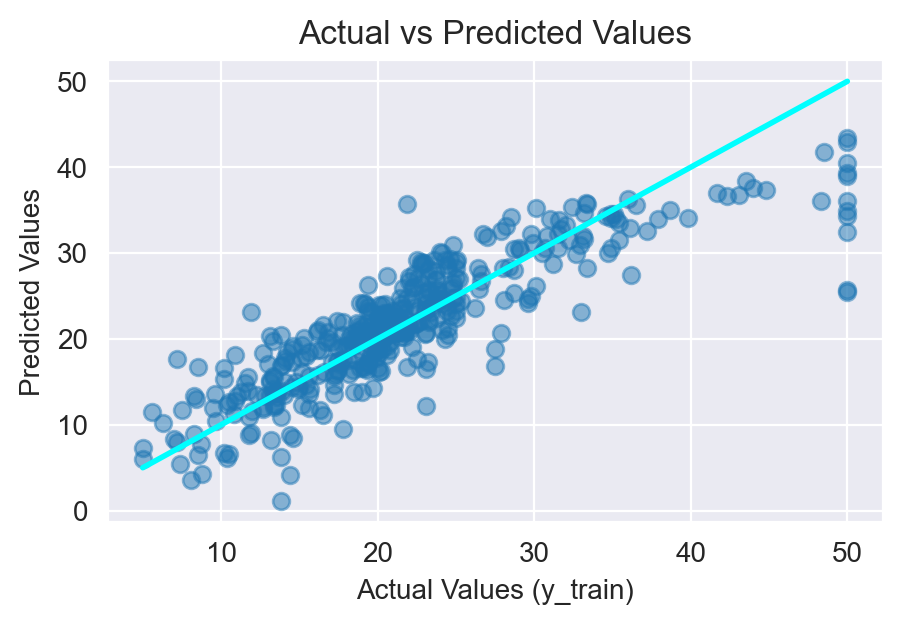

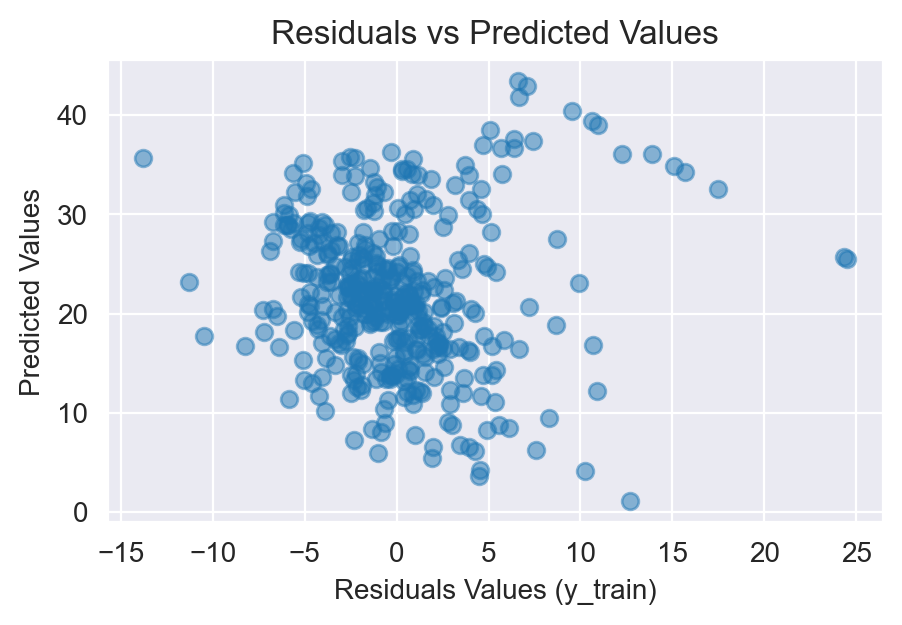

In [27]:
plt.figure(figsize=(5,3),dpi=200)
plt.scatter(y_train,model_predictions,alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='cyan', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

plt.figure(figsize=(5,3),dpi=200)
plt.scatter(residuals,model_predictions,alpha=0.5)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Residuals Values (y_train)')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

Why do we want to look at the residuals? We want to check that they look random. Why? The residuals represent the errors of our model. If there's a pattern in our errors, then our model has a systematic bias.

We can analyse the distribution of the residuals. In particular, we're interested in the **skew** and the **mean**.

In an ideal case, what we want is something close to a normal distribution. A normal distribution has a skewness of 0 and a mean of 0. A skew of 0 means that the distribution is symmetrical - the bell curve is not lopsided or biased to one side. Here's what a normal distribution looks like: 


The avearge of residuals is :-1.706e-15
The skewness of Normal Distribution is :1.45


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 1000x600 with 0 Axes>

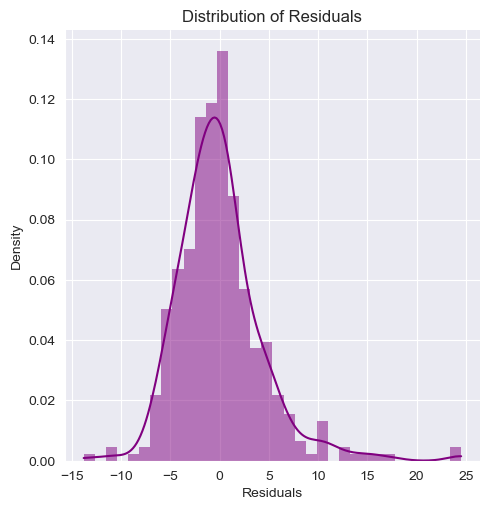

In [28]:
print(f'The avearge of residuals is :{np.mean(residuals):,.4}')
print(f'The skewness of Normal Distribution is :{skew(residuals):,.3}')
plt.figure(figsize=(10, 6))
sns.displot(residuals, kde=True, stat='density', color='purple', linewidth=0)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.grid(True)
plt.show()


### Data Transformations for a Better Fit

We have two options at this point: 

1. Change our model entirely. Perhaps a linear model is not appropriate. 
2. Transform our data to make it fit better with our linear model. 

Let's try a data transformation approach. 

Investigate if the target `data['PRICE']` could be a suitable candidate for a log transformation. 
The Log_Price distribution has skew closer to zero 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



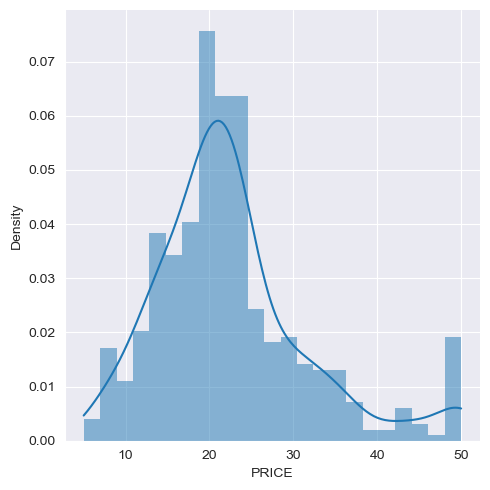

In [29]:
sns.displot(data.PRICE,stat='density',linewidth=0,kde=True)

log_prices = np.log(data.PRICE)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



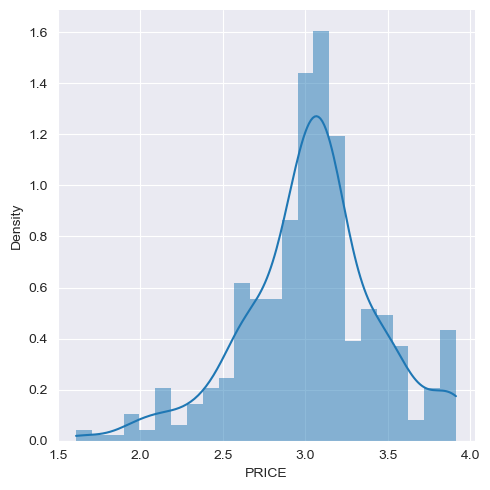

In [30]:
sns.displot(log_prices,stat='density',kde=True,linewidth=0)

#### How does the log transformation work?

Using a log transformation does not affect every price equally. Large prices are affected more than smaller prices in the dataset. Here's how the prices are "compressed" by the log transformation:

<img src=https://i.imgur.com/TH8sK1Q.png height=200>

We can see this when we plot the actual prices against the (transformed) log prices. 

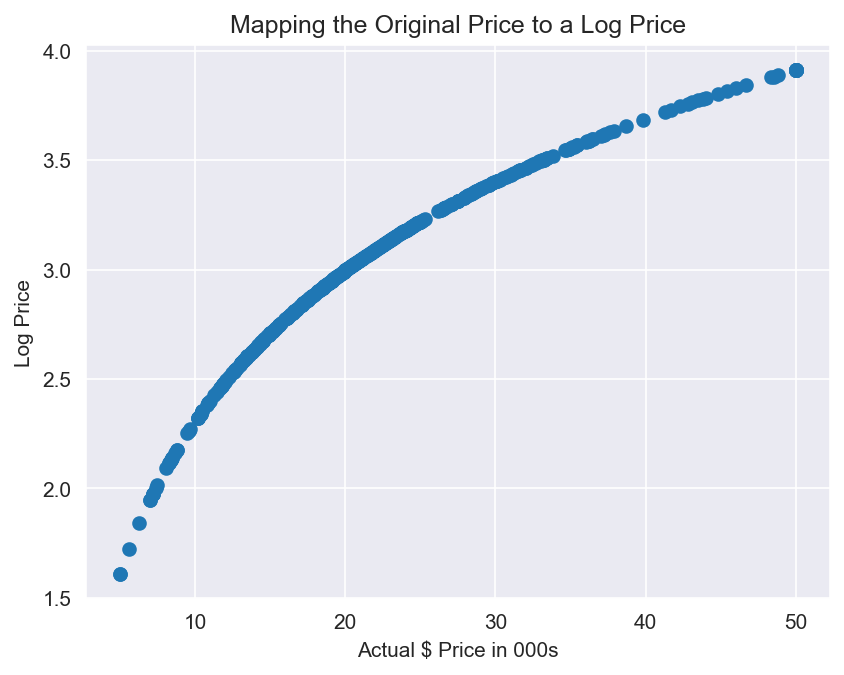

In [31]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, np.log(data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$


In [32]:
X_trans = data.drop(columns=['PRICE'])
y_trans = log_prices

In [33]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_trans,y_trans,test_size=0.2,random_state=10)

regression_trans = LinearRegression()
'''Changing the model by splitting the data into training and testing and calculating r^2 again'''
regression_trans.fit(X_train_1,y_train_1)
regression_trans.score(X_train_1,y_train_1)

0.7930234826697584

## Evaluating Coefficients with Log Prices


In [38]:
df_coefficients_transformed = pd.DataFrame({'Features':X_train.columns,'Transformed Coeff':regression_trans.coef_})
df_coefficients_transformed

Features  Transformed Coeff
0      CRIM              -0.01
1        ZN               0.00
2     INDUS               0.00
3      CHAS               0.08
4       NOX              -0.70
5        RM               0.07
6       AGE               0.00
7       DIS              -0.05
8       RAD               0.01
9       TAX              -0.00
10  PTRATIO              -0.03
11        B               0.00
12    LSTAT              -0.03

## Regression with Log Prices & Residual Plots


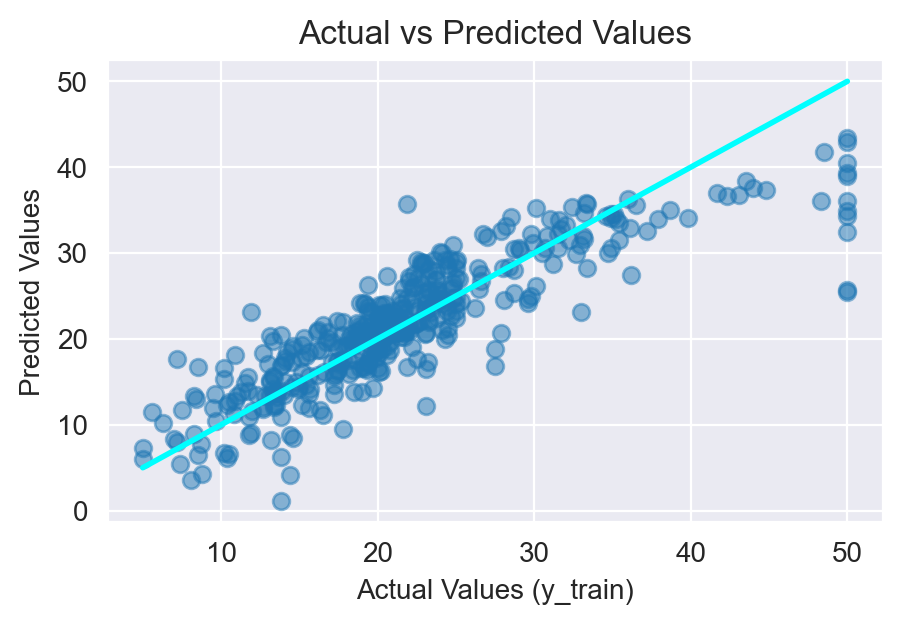

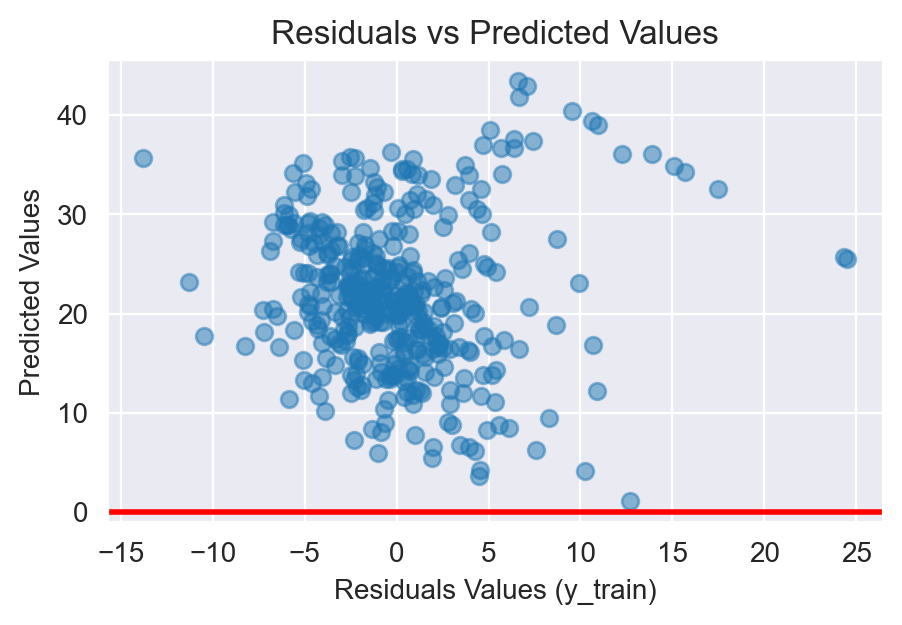

In [39]:
''' Regression Model without Log Prices'''
plt.figure(figsize=(5,3),dpi=200)
plt.scatter(y_train,model_predictions,alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='cyan', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

plt.figure(figsize=(5,3),dpi=200)
plt.scatter(residuals,model_predictions,alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Residuals Values (y_train)')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

Skewness of the residual:-0.1862247432284202


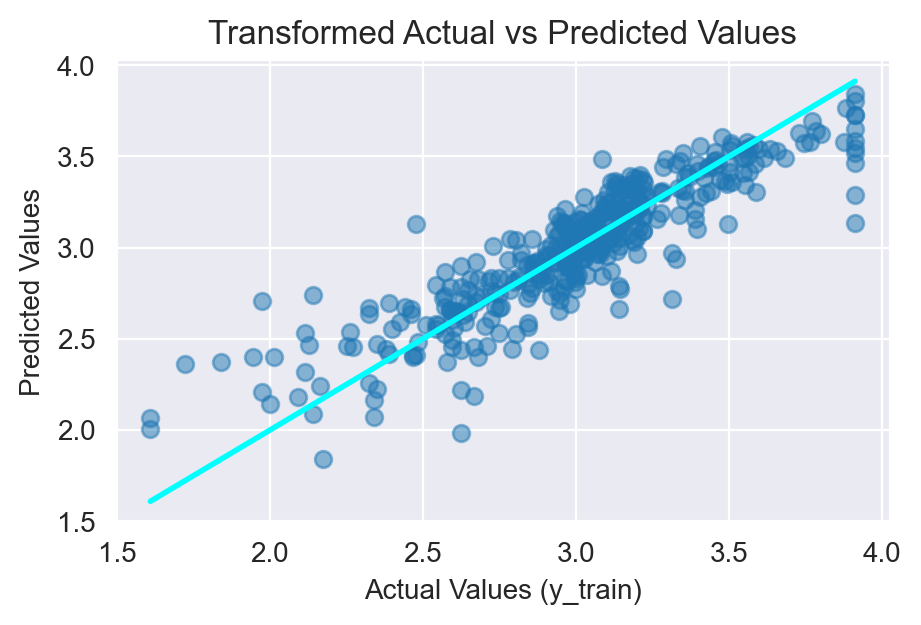

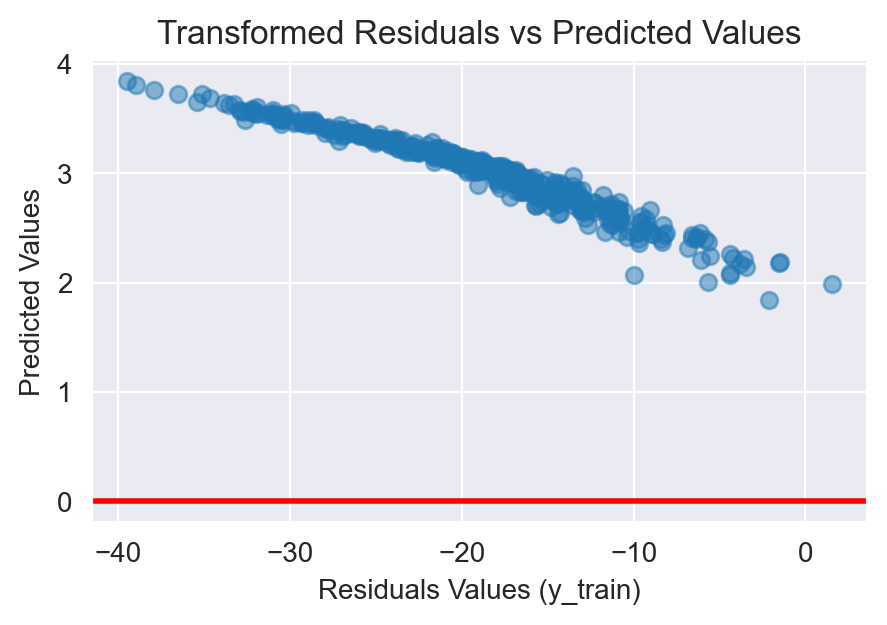

In [40]:
'''Regression Model with log prices'''
model_predictions_trans = regression_trans.predict(X_train)
residuals_trans = y_train_1 - model_predictions

print(f'Skewness of the residual:{skew(residuals_trans)}')


plt.figure(figsize=(5,3),dpi=200)
plt.scatter(y_train_1,model_predictions_trans,alpha=0.5)
plt.plot([y_train_1.min(), y_train_1.max()], [y_train_1.min(), y_train_1.max()], color='cyan', linewidth=2)
plt.title('Transformed Actual vs Predicted Values')
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

plt.figure(figsize=(5,3),dpi=200)
plt.scatter(residuals_trans,model_predictions_trans,alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.title('Transformed Residuals vs Predicted Values')
plt.xlabel('Residuals Values (y_train)')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [41]:
mean_residuals_trans = np.mean(residuals_trans)
skewness_residuals_trans = skew(residuals_trans)

print(f"Mean of residuals with log prices: {mean_residuals_trans}")
print(f"Skewness of residuals with log prices: {skewness_residuals_trans}")

Mean of residuals with log prices: -18.836238307815993
Skewness of residuals with log prices: -0.1862247432284202


# Compare Out of Sample Performance 


In [53]:
'''Comparing R^2 for two models '''

y_pred_1 = regression.predict(X_test)
y_pred_2 = regression_trans.predict(X_test_1)

'''If R^2 is lower on the test set compared to the training set, it could indicate that the model is overfitting the training data. Overfitting occurs when the model learns noise and random fluctuations in the training data, making it less effective at predicting new data'''


'If R^2 is lower on the test set compared to the training set, it could indicate that the model is overfitting the training data. Overfitting occurs when the model learns noise and random fluctuations in the training data, making it less effective at predicting new data'

In [55]:
r2_model1 = r2_score(y_test, y_pred_1)
r2_model2 = r2_score(y_test_1, y_pred_2)
r2_model_1 = r2_score(y_train,model_predictions)
r2_model_2 = r2_score(y_train_1,model_predictions_trans)

print(f"R-squared for Model 1 for Train set : {r2_model_1}")
print(f"R-squared for Model 2 for Train set: {r2_model_2}")
print(f"R-squared for Model 1 for Test set : {r2_model1}")
print(f"R-squared for Model 2 for Test set: {r2_model2}")


'''Models with higher complexity might perform well on training data but generalize poorly to new data, resulting in a lower score on the test set'''

R-squared for Model 1 for Train set : 0.750121534530608
R-squared for Model 2 for Train set: 0.7930234826697584
R-squared for Model 1 for Test set : 0.6709339839115633
R-squared for Model 2 for Test set: 0.7446922306260724


'Models with higher complexity might perform well on training data but generalize poorly to new data, resulting in a lower score on the test set'

#### Model 2 performs better, as it has higher R-squared scores on both training and test sets compared to Model 1.The R-squared scores help evaluate how well the models capture the variability in home prices, with higher scores indicating better performance in explaining and predicting home prices.

# Predict a Property's Value using the Regression Coefficients

Our preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

The average property has the mean value for all its charactistics:

In [34]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
property_stats

CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
0  3.61 11.36  11.14  0.07 0.55 6.28 68.57 3.80 9.55 408.24    18.46 356.67   

   LSTAT  
0  12.65

**Challenge**

Predict how much the average property is worth using the stats above. What is the log price estimate and what is the dollar estimate? You'll have to [reverse the log transformation with `.exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html?highlight=exp#numpy.exp) to find the dollar value. 

In [90]:
# Predict log prices for average property using property_stats
# Reverse the log transformation to get dollar value estimate
log_price_pred = regression_trans.predict(property_stats)
dollar_value_pred = np.exp(log_price_pred)*1000

print(f"Log Price Estimate: {log_price_pred[0]}")
print(f"Dollar Estimate: ${dollar_value_pred[0]:,.2f}")

Log Price Estimate: 3.0302872305633954
Dollar Estimate: $20,703.18


**Challenge**

Keeping the average values for CRIM, RAD, INDUS and others, value a property with the following characteristics:

In [72]:
# Define Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20 
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [93]:
# Solution:

property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town

if next_to_river:
    property_stats['CHAS'] = 1
else:
    property_stats['CHAS'] = 0

property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty


input_property = pd.DataFrame(data=property_stats,index=[0])

In [94]:
property_pred_log = regression_trans.predict(input_property)

property_pred_log_dollors = np.exp(property_pred_log)*1000

In [95]:
print(f"Log Price Estimate: {property_pred_log[0]}")
print(f"Dollar Estimate: ${property_pred_log_dollors[0]:,.2f}")

Log Price Estimate: 3.2500653694409216
Dollar Estimate: $25,792.03
